In [1]:
import theme
theme.load_style()

# Lesson 3: Direct Methods
## 1D Spring Elements

<img src="Images/direct.d/intro.png" width='700pt'/>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

This lecture by Tim Fuller is licensed under the
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

<a id='top'></a>

# Topics

- [Introduction to FEA](#intro_to_fea)
- [Direct Stiffness Method](#dir_stiff_methd)
  - [Example 1: Tapered Bar](#tapered_bar)
  - [Example 2: Parallel Spring Network](#multi_spring)
  - [Example 3: Prescribed Displacements](#presc_disp)
  - [Example 4: Self Weight](#ex_self_weight)
- [Computational Implementation](#comp_impl)
  - [Pre Processing](#preproc)
  - [Solution Phase](#solphase)
  - [Example Linear Finite Element Code](#one_d_code)
- [Exercises](#exercises)

<a id="intro_to_fea"></a> 
# Introduction to FEA[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

The general steps in solving a problem using FEM:

**Preprocessing Phase**

1. Discretize the problem domain and choose element type
2. Assume solution that approximates the element behavior
3. Define the Strain/Displacement and Stress/Strain Relationships
4. Derive the element stiffness matrix and equations
5. Assemble element equations into global equations
6. Introduce boundary conditions

**Solution Phase**

1. Solve for the unknown degrees of freedom
2. Compute reactions

**Postprocessing Phase**

1. Find element strains and stresses and other important information.
2. Interpret results

# <a id='dir_stiff_methd'></a> The Direct Stiffness Method[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

We first demonstrate the discretization process and other steps of the FEM through the direct stiffness method. In future lectures we will discuss other discretization methods. We now demonstrate the direct stiffness method through a number of examples familiar to students of mechanical engineering.

## <a id='tapered_bar'></a>  Example 1: Tapered Bar

Consider the problem of finding the displacement $\delta$ at the free end of the tapered bar, caused by the axial force $F$.

<img src="Images/direct.d/tapered_bar.png"/>

For a small taper angle we can obtain a reasonable approximation for the displacement by


$$
   \delta_{\scriptscriptstyle\mathrm{approx}} = \frac{PL}{A'E}
$$


where $A'=A_0/2$.  Suppose that the angle of the taper is not negligible and that $E$ is not constant but varies along the length of the beam. Let's use the finite element method to find the approximate displacement to this more difficult problem. We will follow the general steps of the FEM already outlined.

### Preprocessing Phase

#### Step 1: Discretize and Select Element Type

Discretization is accomplished by subdividing the problem domain into *finite elements* connected by *nodes*, as shown below.  The original tapered beam is divided into 4 finite elements with 5 nodes. Each element has a length $l$ and uniform cross-sectional area $A$ represented by the average area of the cross sections at the nodes. We choose for our element type a spring.  The spring element is chosen for its simplicity in understanding and implementing. As the semester progresses we will use other more sophisticated elements. However, for now, the spring element is sufficient in helping us understand the general steps of the FEM.

<img src="Images/direct.d/tapered_bar_disc.png" style='width:80%'/>

We concentrate now on the chosen spring element.  Let us isolate one element from the global $x$ coordinates shown and put it in its own local coordinate system $\hat{x}$ and study its properties there.

<img src="Images/direct.d/springelem12.png" style='width:80%'/>

Take note of the new syntax.  Hatted quantities ($\hat{f}$, $\hat{u}$) are reckoned with respect to the local coordinate $x$.  That is, $\hat{x}_1=0$ and $\hat{x}_2=L$, where $L$ is the element length.  Another, alternative notation is also shown - that of explicitly labeling the element number as a superscript to the property.

<div class="msg">
<b> Properties of the Spring Element </b> <br>

<ul>
<li> Two nodes per element
<li> One translational degree of freedom at each node, meaning that each node can displace only along the axis of the spring.
<li> Each spring element has a total of two degrees of freedom.
</ul>
</div>

<div class="msg msg-info">
<b>Remark</b><br>
We distinguish between degrees of the system, degrees of freedom of the element, and degrees of freedom of the node.  In general, a node has $n_{\text{dof}}^{\text{n}}$ degrees of freedom; an element has $n_{\text{dof}}^{\text{e}} = n \times n_{\text{dof}}^{\text{n}}$ degrees of freedom, where $n$ is the number of nodes defining the element element; and the system has $n_{\text{dof}}^{\text{sys}} = N \times n_{\text{dof}}^{\text{n}}$ degrees of freedom, where $N$ is the total number of nodes.  We'll come back to the significance of these statements when discussing computational implementation.
</div>

For the following steps we will consider only one of the four elements in our discretized problem domain. Later we will take into account the other elements. Let's choose element two

<img src="Images/direct.d/springelem212.png" style='width:80%'/>

#### Step 2: Select a Displacement Function

In the direct stiffness method that we cover today the selection of a the displacement function is not necessary. Thus, we will skip this step and save it for a later lecture.

#### Step 3: Define the Strain/Displacement and Stress/Strain Relationship

Recall from elementary physics that the force stretch relationship for an ideal spring, assuming small displacements, is given by $F=k\delta$

where $k$ is the spring constant and $\delta$ is the displacement.
Observing the stretched spring, the displacement $\delta$ is

$$
\delta = u_2^{(2)}  - u_1^{(2)}
$$

and 

$$
f = k_2\left(u_2^{(2)} - u_1^{(2)}\right)
$$

where $k_{2}$ is the spring constant for element 2.

<div class="msg msg-error">
<b> Recall </b> <br>
The equivalent spring stiffness of a bar is given by k=AE/L
</div>

#### Step 4: Derive Element Stiffness Matrix and Equations

We now derive the stiffness matrix for the spring element. The nodal forces are

$$
f_1^{(2)} = -k_2\left(u_2^{(2)} - u_1^{(2)}\right)
$$

$$
f_2^{(2)} = k_2\left(u_2^{(2)} - u_1^{(2)}\right)
$$

combining and putting in matrix form gives

$$
  \begin{Bmatrix} f_1^{(2)} \\ f_2^{(2)} \end{Bmatrix} 
= \begin{bmatrix} k_2 & -k_2 \\ -k_2 & k_2 \end{bmatrix}
  \begin{Bmatrix} u_1^{(2)} \\ u_2^{(2)} \end{Bmatrix}
$$.

#### Step 5: Assemble Element Equations into Global Equations

The preceding analysis applied only to element two of our example problem. The exact same analysis can be performed on the remaining elements and the conclusions would be the same, namely, for elements 1, 3, and 4

$$
  \begin{Bmatrix} f_1^{(1)} \\ f_2^{(1)} \end{Bmatrix} 
= \begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1 \end{bmatrix}
  \begin{Bmatrix} u_1^{(1)} \\ u_2^{(1)} \end{Bmatrix}
$$

$$
  \begin{Bmatrix} f_1^{(3)} \\ f_2^{(3)} \end{Bmatrix} 
= \begin{bmatrix} k_3 & -k_3 \\ -k_3 & k_3 \end{bmatrix}
  \begin{Bmatrix} u_1^{(3)} \\ u_2^{(3)} \end{Bmatrix}
$$

$$
  \begin{Bmatrix} f_1^{(4)} \\ f_2^{(4)} \end{Bmatrix} 
= \begin{bmatrix} k_4 & -k_4 \\ -k_4 & k_4 \end{bmatrix}
  \begin{Bmatrix} u_1^{(4)} \\ u_2^{(4)} \end{Bmatrix}
$$

Now that we have developed stiffnesses for individual elements it is our goal to develop a global stiffness for the structure. Before we look at the global stiffness, however, let's look the nodal displacements. Note that elements 1, 2 3, and 4 must remain connected at common nodes 2, 3, and 4. This is called *continuity* or the *compatibility requirement*. This compatibility yields the following relationships:

$$
   \begin{split}
     u_{2}^{(1)} &= u_{1}^{(2)} = u_{2}\\
     u_{2}^{(2)} &= u_{1}^{(3)} = u_{3}\\
     u_{2}^{(3)} &= u_{1}^{(4)} = u_{4}\\
   \end{split}
$$


also, since nodes 1 and 5 are only connected to one element each


$$
   \begin{split}
     u_{1}^{(1)} &= u_{1}\\
     u_{2}^{(4)} &= u_{5}
   \end{split}
$$


From the free-body diagrams of each node and the fact that external forces must equal the internal forces at each node, we can write the nodal equilibrium equations for nodes 1, 2, 3, 4, and 5 as


$$
   \begin{split}
     f_{1} = f_{1}^{(1)} &= R \\
     f_{2} = f_{2}^{(1)} + f_{1}^{(2)} &= 0 \\
     f_{3} = f_{2}^{(2)} + f_{1}^{(3)} &= 0 \\
     f_{4} = f_{2}^{(3)} + f_{1}^{(4)} &= 0 \\
     f_{5} = f_{2}^{(4)} &= F \\
   \end{split}
$$

Making substitutions we find


$$
   \begin{split}
     R &= k_{1}u_{1} - k_{1}u_{2} \\
     0 &= -k_{1}u_{1} + k_{1}u_{2} + k_{2}u_{2}-k_{2}u_{3} \\
     0 &= -k_{2}u_{2} + k_{2}u_{3} + k_{3}u_{3} - k_{3}u_{4} \\
     0 &= -k_{3}u_{3} + k_{3}u_{4} + k_{4}u_{4} - k_{4}u_{5} \\
     F &= -k_{4}u_{4} + k_{4}u_{5}\\
     \end{split}
$$


In matrix form


$$
   \begin{Bmatrix}
     R \\ 0 \\ 0 \\ 0 \\ F
   \end{Bmatrix}
   =
   \begin{bmatrix}
     k_{1} & -k_{1} & 0 & 0 & 0\\
     -k_{1} & k_{1} + k_{2} & -k_{2} & 0 & 0\\
     0 & -k_{2} & k_{2} + k_{3} & -k_{3} & 0 \\
     0 & 0 & -k_{3} & k_{3} + k_{4} & -k_{4} \\
     0 & 0 & 0 & -k_{4} & k_{4}
   \end{bmatrix}
   \begin{Bmatrix}
     u_{1} \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$.

<div class="msg">
<b> Note: </b> There is more than one way to assemble the global system of equations.  Another method is using superposition, as shown below
</div>

These global equations can also be obtained using the superposition. Let's write the local force/displacement equation for element 1 in the following expanded form


$$
   \begin{Bmatrix}
     f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \\ f_{5}
   \end{Bmatrix}
   =
   \begin{Bmatrix}
     R \\ 0 \\ 0 \\0 \\ 0
   \end{Bmatrix}
   =
   \begin{bmatrix}
     k_{1} & -k_{1} & 0 & 0 & 0 \\
     -k_{1} & k_{1} & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0
   \end{bmatrix}
   \begin{Bmatrix}
     u_{1} \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$


Similarly,


$$
   \begin{Bmatrix}
     f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \\ f_{5}
   \end{Bmatrix}
   =
   \begin{Bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ 0
   \end{Bmatrix}
   =
   \begin{bmatrix}
     0 & 0 & 0 & 0 & 0 \\
     0 & k_{2} & -k_{2} & 0 & 0 \\
     0 & -k_{2} & k_{2} & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0
   \end{bmatrix}
   \begin{Bmatrix}
     u_{1} \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$

$$
   \begin{Bmatrix}
     f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \\ f_{5}
   \end{Bmatrix}
   =
   \begin{Bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ 0
   \end{Bmatrix}
   =
   \begin{bmatrix}
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & k_{3} & -k_{3} & 0 \\
     0 & 0 & -k_{3} & k_{3} & 0 \\
     0 & 0 & 0 & 0 & 0
   \end{bmatrix}
   \begin{Bmatrix}
     u_{1} \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$

and

$$
   \begin{Bmatrix}
     f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \\ f_{5}
   \end{Bmatrix}
   =
   \begin{Bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ F
   \end{Bmatrix}
   =
   \begin{bmatrix}
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & k_{4} & -k_{4} \\
     0 & 0 & 0 & -k_{4} & k_{4}
   \end{bmatrix}
   \begin{Bmatrix}
     u_{1} \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$

This process can be generalized and the global displacement/force equations written


$$
   \{F\}= [K] \{u\}
$$


Where


$$
   [K] = \sum_{e=1}^N [k]^{(e)}
   \quad \mathrm{and} \quad
   \{F\} = \sum_{e=1}^N \{f\}^{(e)}
$$


where $[k]^{(e)}$ and $\{f\}^{(e)}$ are the expanded element stiffness and force, respectively.

##### Degree of Freedom Mapping

This assembly procedure defines a mapping from local degrees of freedom to global degrees of freedom.  Mathematically, the mapping from local to global degrees of freedom is given by

$$
n_{\text{dof}}^{\text{sys}} = n \times n_{\text{dof}}^{\text{d}} + d
$$ 

where $n$ is the global node number and the local degree of freedom $d$ takes values $0, 1, 2$ for the $x, y, z$ degree of freedom, respectively.

Graphically, the mapping looks like

<img src='./Images/direct.d/dof_map.png' style='width:80%'/>

<div class="msg msg-error">
This mapping is true only for node numbering staring at 0!
</div>

#### Step 6: Apply Boundary Conditions

It can be shown that $\det{[K]}=0$, or, $[K]$ is non-invertible. Meaning that, **as is, the system is not stable** and has either no solutions or infinite solutions. Boundary conditions must be supplied to make the system non-singular. This makes sense intuitively, before boundary conditions are specified the structure is free to move without constraint, meaning that there are infinite solutions for the displacement at each node.

For our tapered bar problem, consider the condition that the origin is fixed. Boundary conditions of this type are called *homogeneous*. In our example, this means that $u_{1}=0$ and 


$$
   \begin{Bmatrix}
     R \\ 0 \\ 0 \\ 0 \\ F \\
   \end{Bmatrix}
   =
   \begin{bmatrix}
     k_{1} & -k_{1} & 0 & 0 & \\
     -k_{1} & k_{1} + k_{2} & -k_{2} & 0 & 0 \\
     0 & -k_{2} & k_{2} + k_{3} & -k_{3} & 0 \\
     0 & 0 & -k_{3} & k_{3} + k_{4} & -k_{4} \\
     0 & 0 & 0 & -k_{4} & k_{4}
   \end{bmatrix}
   \begin{Bmatrix}
     0 \\ u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$


note that the displacements $u_{2}, u_{3},$ and $u_{4}$ do not explicitly depend on the reaction force $f_{1}$, this motivates us to write the following partitions:


$$
   \begin{Bmatrix}
     R \\ \hline 0 \\ 0 \\ 0 \\ F \\
   \end{Bmatrix}
   =
   \left[
     \begin{array}{c|ccc}
       k_{1} & -k_{1} & 0 & 0 & 0\\
       \hline -k_{1} & k_{1}+k_{2} & -k_{2} & 0 & 0 \\
       0 & -k_{2} & k_{2} + k_{3} & -k_{3} & 0 \\
       0 & 0 & -k_{3} & k_{3} + k_{4} & -k_{4} \\
       0 & 0 & 0 & -k_{4} & k_{4}
     \end{array}
   \right]
   \begin{Bmatrix}
     0 \\ \hline u_{2} \\ u_{3} \\ u_{4} \\ u_{5}
   \end{Bmatrix}
$$


or,


$$
   \begin{Bmatrix}
     \{F^1\} \\ \{F^2\}
   \end{Bmatrix}
   =
   \begin{bmatrix}
    \left[K^{11}\right] & \left[K^{12}\right] \\
    \left[K^{21}\right] & \left[K^{22}\right]
  \end{bmatrix}
  \begin{Bmatrix}
    \{u^1\} \\ \{u^2\}
  \end{Bmatrix}
$$


where


$$
   \{F^1\}=[R]^T, \quad \{F^2\}=[0, \ 0, \ 0, \ F]^T
$$




$$
   \left[K^{11}\right] = \left[ k_{1} \right],
   \ldots,
   \left[K^{22}\right] =
   \begin{bmatrix}
     k_{1}+k_{2} & -k_{2} & 0 & 0 \\
     -k_{2} & k_{2}+k_{3} & -k_{3} & 0 \\
     0 & -k_{3} & k_{3} + k_{4} & -k_{4} \\
     0 & 0 & -k_{4} & k_{4}
   \end{bmatrix}
$$


and


$$
   \{u^1\} = [0]^T,
   \quad
   \{u^2\} = \left[u_{2}, \ u_{3}, \ u_{4}, \ u_{5} \right]^T
$$


In expanded form,


$$
   \{F^1\}=\left[ K^{11}\right]\{u^1 \} + \left[ K^{12} \right] \{u^2\}
$$

$$
   \{F^2\} = \left[K^{21}\right]\{u^1 \} + \left[K^{22}\right]\{u^2\}
$$

<div class="msg">
The above method of applying boundary conditions is referred to as a partitioning method.  If combined with re-ordering of the global equations, it is a great way of decreasing the size of the system being solved.  However, it is more difficult to implement computationally.
</div>

### Solution Phase

#### Step 1: Solve for the Nodal Displacements

Solve for displacements that satisfy

$$
[K]^*\{u\} = \{F\}^*
$$

where $[K]^*$ and $\{F\}^*$ are the boundary condition modified stiffness and force.

Upon solving for $\{u\}$ we find

$$
  \begin{Bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{Bmatrix}
  =
  F \begin{Bmatrix} 0 \\
                    \frac{1}{k_1} \\
                    \frac{1}{k_1} + \frac{1}{k_2}  \\
                    \frac{1}{k_1} + \frac{1}{k_2} + \frac{1}{k_3} \\
                    \frac{1}{k_1} + \frac{1}{k_2} + \frac{1}{k_3} + \frac{1}{k_4}
  \end{Bmatrix}
$$.

#### Step 2: Compute Reactions

Finally, the reaction force at the fixed boundary can be found from

$$
\{r\} = [K]\{u\} - \{f\}
$$

which, for this example, reduces to

$$
   f_{1}
   = -k_{1}u_{2} = -F
$$


which is not a surprising result.

### Post Processing Phase

#### Step 1: Find element strains and stresses and other important information.

##### General Spring Element

For spring elements, post processing involves computing resultant element elongation and forces

<table id='mytable'>
<tr><td>Element Elongation</td><td>Element Forces</td></tr>
<tr><td>
$$\begin{pmatrix}
\Delta L^{(1)} \\
\Delta L^{(2)} \\
\Delta L^{(3)} \\
\end{pmatrix} = 
\begin{pmatrix}
u_2 - u_1 \\
u_3 - u_2 \\
u_4 - u_3
\end{pmatrix} $$</td>
<td>$$\begin{pmatrix}
f^{(1)} \\
f^{(2)} \\
f^{(3)}
\end{pmatrix} = 
\begin{pmatrix}
k^{(1)}\Delta L^{(1)} \\
k^{(1)}\Delta L^{(2)} \\
k^{(1)}\Delta L^{(3)}
\end{pmatrix} $$
</td></tr>
</table>

##### Bar Element

For bar elements, post processing involves computing resulant strains, stresses, and forces.

<table id='mytable-1'>
<tr><td>Element Elongation</td><td>Element Strains</td></tr>
<tr><td>$$\begin{pmatrix}
\Delta L^{(1)} \\
\Delta L^{(2)} \\
\Delta L^{(3)}
\end{pmatrix} = 
\begin{pmatrix}
u_2 - u_1 \\
u_3 - u_2 \\
u_4 - u_3
\end{pmatrix} $$</td>
<td>$$\begin{pmatrix}
\epsilon^{(1)} \\
\epsilon^{(2)} \\
\epsilon^{(3)}
\end{pmatrix} = 
\begin{pmatrix}
\Delta L^{(1)} / L^{(1)} \\
\Delta L^{(2)} / L^{(2)} \\
\Delta L^{(3)} / L^{(3)}
\end{pmatrix}$$</td></tr>
</table>

<table id='mytable-1'>
<tr><td>Element Stresses</td><td>Element Forces</td></tr>
<tr><td>$$ \begin{pmatrix}
\sigma^{(1)} \\
\sigma^{(2)} \\
\sigma^{(3)}
\end{pmatrix} =
\begin{pmatrix}
E^{(1)}\epsilon^{(1)} \\
E^{(2)}\epsilon^{(2)} \\
E^{(3)}\epsilon^{(3)}
\end{pmatrix}$$ </td>
<td>$$ \begin{pmatrix}
f^{(1)} \\
f^{(2)} \\
f^{(3)}
\end{pmatrix} = 
\begin{pmatrix}
A^{(1)}\sigma^{(1)} \\
A^{(2)}\sigma^{(2)} \\
A^{(3)}\sigma^{(3)}
\end{pmatrix}$$</td>
</tr>
</table>.

### <a id='multi_spring'> </a> Example 2: Parallel Spring Network

Consider the following network of springs

<img src='Images/direct.d/multi_spring.png' style='width:80%'/>

<img src='Images/direct.d/multi_spring_1.png' style='width:80%'/>

With the left and right edges of the plate is fixed as shown, what is the displacement of the rigid bar due to the force $P$?

We solve the problem using the same steps as above.  However, we solve the problem entirely using sympy.

#### Preprocessing Phase

Individual element stiffnesses take the same form as in previous examples.  However, when inserting the element stiffnesses in to the appropriate locations in the global stiffness, we must account for the fact that 3 elements have node 2 in common.  Note that

$$
   \begin{split}
     u_{1}^{(1)} &= u_{1} = 0 \\
     u_{2}^{(1)} = u_{1}^{(2)} = u_{1}^{(3)} &= u_{2} \\
     u_{2}^{(3)} &= u_{3} = 0 \\
     u_{2}^{(4)} &= u_{4} = 0 \\
   \end{split}
$$

Expansion of element stiffness for insertion in to the global stiffness is demonstrated below.

In [6]:
import sympy as sp
import numpy as np
from sympy import Matrix, symbols, Symbol, zeros as spzeros, init_printing, N
init_printing()

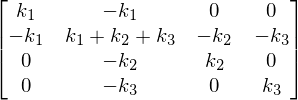

In [7]:
# Expand element stiffnesses to have same shape as global stiffness
# by inserting appropriate columns and rows of zeros.
k1, k2, k3 = symbols('k1 k2 k3')
K1 = Matrix(4, 4, lambda i,j: 0)
K1[0:2, 0:2] = Matrix(2, 2, lambda i,j: k1 if i==j else -k1)
K2 = Matrix(4, 4, lambda i,j: 0)
K2[1:3, 1:3] = Matrix(2, 2, lambda i,j: k2 if i==j else -k2)
K3 = Matrix(4, 4, lambda i,j: 0)
K3[1, :] = Matrix(1,4,[0,k3, 0, -k3])
K3[3, :] = Matrix(1,4,[0,-k3, 0, k3])
Kg = K1 + K2 + K3
Kg

##### Apply Boundary Conditions

In this example, we apply boundary conditions using the "penalty method".  The penalty method is easily explained by example.  Consider the global system of equations

$$
\begin{bmatrix} 
k_1 & -k_1 & 0 & 0\\
-k_1 & k_1+k_2+k_3 & -k_2 & -k_3 \\
0 & -k_2 & k_2 & 0 \\
0 & -k_3 & 0 & k_3 
\end{bmatrix}
\begin{Bmatrix} 
u_1 \\
u_2  \\
u_3 \\
u_4
\end{Bmatrix}
=
\begin{Bmatrix} 
R_1 \\
P  \\
R_3 \\
R_4
\end{Bmatrix}
$$

We substitute for the unknown reactions the known boundary conditions times a large number $X$.  In the stiffness matrix, we substitute the appropriate components with $X$, as shown:

$$
\begin{bmatrix} 
X & -k_1 & 0 & 0\\
-k_1 & k_1+k_2+k_3 & -k_2 & -k_3 \\
0 & -k_2 & X & 0 \\
0 & -k_3 & 0 & X
\end{bmatrix}
\begin{Bmatrix} 
u_1 \\
u_2  \\
u_3 \\
u_4
\end{Bmatrix}
=
\begin{Bmatrix} 
X u^*_1 \\
P  \\
X u^*_3 \\
X u^*_4
\end{Bmatrix}
$$

Inspecting row 1, we see

$$Xu_1 - k_1 u_2 = X u_1^*$$

where $u_1^*$ is the known boundary condition ($u_1^*=0$ in this case).  On dividing by $X$ we get

$$u_1 - \frac{k_1 u_2}{X} = u_1^*$$

if $X$ is chosen large enough $\frac{k_1 u_2}{X} \approx 0$ and

$$u_1 \approx u_1^*$$

Generally, the penalty method follows as

For a known displacement $\delta_m$ applied at node $m$ and $X>>\text{any} \ K_{ij}$

$$\begin{align} K_{mm} &= X \\ F_{m} &= X\delta_m \end{align}$$


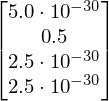

In [8]:
# Apply boundary conditions by setting appropriate components of K
# to 0 or 1.  We form K by making a copy of Kg so that we can retain
# the original stiffness.
K = Matrix(Kg)
X = 1.E+30
K[0,0] = X
K[2,2] = X
K[3,3] = X

# Form the force array F.  Note that f1 and f3 are the unknown reaction
# forces
P = symbols('P')
F = Matrix(4, 1, [0, P, 0, 0])

# Solve for displacements.
u = K.LUsolve(F)

# At this point, the solution will be messy. 
# Let's substitute some actual numbers
subs ={k1: 10, k2: 5, k3: 5, P: 10}
N(u.subs(subs))

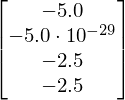

In [9]:
# Solve for reactions by back substituting u in to the global equations
react = Kg * u - F
react.subs(subs)

Which is exactly as expected.

<div class="msg">
The penalty method is less accurate as the number of nodes & elements increases, but it is algorithmically simple and leads to a general formulation for boundary conditions.
</div>

### <a id='presc_disp'> </a>  Example 3: Prescribed Displacement

Suppose now, that instead of there being an applied force to the end of our tapered beam we force the displacement at the end of the beam to be some prescribed amount $\delta$.

<img src='Images/direct.d/prescribed_displ.jpg' style='width:80%'>

The solution technique is similar the previous problem. Namely, find element stiffnesses, derive the global stiffness, apply boundary conditions, solve for displacements, and find element forces.

We'll solve this problem again using sympy.

#### Preprocessing Phase

In [10]:
# Stiffness and force symbols
k1, k2, d = symbols('k_1 k_2 delta')

# Global stiffness matrix
Kg = Matrix([[ k1,   -k1,     0], 
             [-k1, k1 + k2, -k2], 
             [ 0,    -k2,    k2]])

##### Apply Boundary Conditions

We've looked at partitioning the system of equations and the penalty method as ways of applying boundary conditions.  In this example we use a substitution method whereby the unknown reactions are substituted with the known boundary conditions and 1s and 0s are substituted in the appropriate locations in the global stiffness.  This is perhaps best shown with an example, consider the global system for this problem

$$
\begin{bmatrix}
k_1 & -k_1 & 0 \\ 
-k_1 & k_1 + k_2 & -k2 \\ 
0 & -k2 & k2
\end{bmatrix}
\begin{Bmatrix}
u_1 \\ 
u_2 \\ 
u_3
\end{Bmatrix}
=
\begin{Bmatrix}
R_1 \\ 
0 \\ 
R_3
\end{Bmatrix} \Longrightarrow
\begin{bmatrix}
1 & 0 & 0 \\ 
-k_1 & k_1 + k_2 & -k2 \\ 
0 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
u_1 \\ 
u_2 \\ 
u_3
\end{Bmatrix}
=
\begin{Bmatrix}
0 \\ 
0 \\ 
\delta
\end{Bmatrix}
$$

It's easy to see that this system of equations satisfies the boundary conditions.

<div class="msg">
<b>Note:</b> The substitution method as shown is simple to implement, but has the (severe) disadvantange that the resulting system of equations is not symmetric.  We will later see how to make the system symmetric
</div>

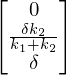

In [11]:
# Apply boundary conditions to a copy of the global stiffness.  We
# set appropriate components to the first and last row of K to 0 or 1
# to strictly enforce the known displacement
K = Matrix(Kg)
K[2,1], K[2,2] = 0, 1

# Form the force array - inserting known boundary conditions in to
# the appropriate locations
f1 = symbols('f1')
F = Matrix([[f1], 
            [0], 
            [d]])

u2, u3 = symbols('u2 u3')
u = Matrix(3, 1, [0, u2, u3])
u[1:, :] = K[1:, 1:].LUsolve(F[1:, :])
u

Solve for reactions

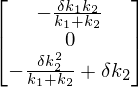

In [12]:
# Solve for reactions by back substitution
react = Kg * u
react

### <a id='ex_self_weight'> </a>  Example 4: Self-Weight

#### Load Types

In previous examples, forces were applied directly to the model nodes.  There are situations, however, that loads act on a body or a surface.  Body loads have units of force per unit mass and scale with element volume.  Surface tractions have units of force per unit area and scale with element surface area or cross section. 

#### Element Body Forces

A *distributed body force* has units of force/length in 1D.  In structural problems, body forces are often the result of gravity.  Body forces can also result from acceleration, e.g., a centripetal force in a centrifuge.

Element force due to a general body load is given by

$$
b^{(e)} = \left(\frac{\text{force}}{\text{mass}}\right)\rho^{(e)} V^{(e)}
$$

The element force due to self-weighted bar:

$$
w^{(e)}=g\rho^{(e)}A^{(e)}L^{(e)}
$$

and the distributed body load is

$$
b(x) = \frac{w^{(e)}}{L^{(e)}} = \frac{m^{(e)}g}{L^{(e)}} 
= \rho^{(e)}A^{(e)}g
$$

#### Nodal Forces

Body loads are defined over the element domain, but our FE method admits only forces applied at nodes.  So, body loads and surface tractions (􏰀point loads)􏰁 are partitioned to neighboring nodes as shown for element 1.

<img src='./Images/direct.d/body-force.png' style='width:80%'/>




# <a id='comp_impl'> </a> Implementing the Direct Stiffness Method Computationally[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

The steps necessary for implementing a 1D linear finite program computationally are shown in the figure below

<img src='./Images/direct.d/algo.png' style='width:80%'/>

The computational implementation requires (minimally)

- specification of mesh, loads and constrains, and material properties
- assembly of element stiffnesses and forces in to the global stiffness and force
- solution of $[K]\{F\}=\{u\}$ for unkown displacements
- post processing results

In the following sections, we walk through the actual machinery to implement the finite elemenet method computationally with the following example.

<img src='./Images/direct.d/algo_ex.jpeg' style='width:80%'/>

## <a id='preproc'></a> Pre Processing

### <a id='mesh_spec'> </a> Mesh Specification

The mesh consists of vertices defining nodal coordinates and element connectivity tables specifiying how vertices are connected.

#### Connectivity Tables

For complex systems, especially in higher dimensions, manually assembling the global stiffness matrix would be tedious and error‐prone. To avoid errors in a FEM code we use a connectivity table, a lookup table that contains the nodes associated with each element.

The element connectivity for our example is

| Element Number  | Node i | Node j |
| :-------------: |:------:| :-----:|
| 1               | 1      | 3      | 
| 2               | 3      | 4      |
| 3               | 4      | 2      |

#### Vertices

Nodal coordinates (vertices) are given as an array of nodal coordinates.  For our example we have

In general, for a 3D mesh we have

|Node|Coordinate|
|:--:|:--------:|
| 1  |$0.$|
| 2  |$3.$|
| 3  |$1.$|
| 4  |$2.$|

Node labels in the first column must correspond to the appropriate node labels in the connectivity table.  But, they need not be given in ascending node order as shown.  Alternatively, we could order the nodal coordinates as 

|Node|Coordinate|
|:--:|:--------:|
| 1  |$0.$|
| 3  |$1.$|
| 4  |$2.$|
| 2  |$3.$|

so long as there is a way for mapping the node label to the appropriate index of the vertices array.  The mechanisim with which this accomplished the use of a node map that maps node labels to the appropriate index in the array of nodal vertices.  For example nodal coordinates in the right column of the above table could be passed and the left column could be passed as the node map.  The finite element program would then use the node map to look up the location of a node's vertices.

### Constraints and Loads

Constraints and loads are specified in such a way that the program can apply the appropriate contraint or load to the correct the node, local degree of freedom, and with the right magnitude.  Several ways exist to pass this information to a program, one way is with an array of the following form

    a = [(node label of constraint/load 1, 'x' 'y' or 'z', magnitude 1),
         (node label of constraint/load 2, 'x' 'y' or 'z', magnitude 2),
                                            .
                                            .
                                            .
         (node label of constraint/load n, 'x' 'y' or 'z', magnitude n)]
         
Each row contains the necessary information for applying a constraint or load to an appropriate node.  Note, in our 1D examples, the local degree of freedom is restricted to be only '`x`'.  This restriction is relaxed when we move on to more than one dimension.

## <a id='solphase'></a> Solution Phase

### Assemble Global Equations

Individual element stiffnesses must be "assembled" or mapped in to the global stiffness in the appropriate locations.  We can use the information in the system's connectivity table to to generate the appropriate mapping.  First consider the following question

<div class="msg">
<b>Q</b>: How can we tell by inspection if the stiffness matrix is correct? <br>

<b>A</b>: Look at the ith row and jth column of K <br>

<ul>
<li> The terms on the ith position of the main diagonal should be the sum of the stiffness for each element connected to the ith degree of freedom.
<li> The off‐diagonal terms in the i,j position should be the negative of the stiffness of the element's connecting degrees of freedom i and j. 
<li> The stiffness should be symmetric
</ul>
</div>

With that in mind, the algorithm for generating the stiffness matrix is:

    K = 0
    k = [k1, k2, k3, ..., kn]
    for all elements
      determine global index I of node i of element
      determine global index J of node j of element
      K[I, I] = K[I, I] + k[el]
      K[J, J] = K[J, J] + k[el]
      K[I, J] = K[I, J] - k[el]
      K[J, I] = K[J, I] - k[el]
    
Incidentally, the algorithm shown is extremely inefficient and can be optimized, but optimization is the job of computer scientists.  As engineers, we seek the right answer as a learning exercise.  In this algorithm, the `i` and `j` global index are determined by the node mapping, previously discussed.

The global force is assembled in a similar fashion.

### Apply Boundary Conditions

Below we implement concepts learned in to a concise code for determining nodal displacements.  Let us first revisit the question of imposing boundary conditions.  In the substitution method we saw that the resulting global stiffness was not symmetric.  For large systems this becomes problematic because solving non-symmetric equations is much more expensive than symmetric.  But, the substitution method is easy to implement and there is not a loss of accuracy as in the penalty method.  Let's modify substitution method so that the system of equations remains symmetric.  We look at Example 3.  We had:

$$
\begin{bmatrix}
k_1 & -k_1 & 0 \\ 
-k_1 & k_1 + k_2 & -k2 \\ 
0 & -k2 & k2
\end{bmatrix}
\begin{Bmatrix}
u_1 \\ 
u_2 \\ 
u_3
\end{Bmatrix}
=
\begin{Bmatrix}
R_1 \\ 
0 \\ 
R_3
\end{Bmatrix} \Longrightarrow
\begin{bmatrix}
1 & 0 & 0 \\ 
-k_1 & k_1 + k_2 & -k2 \\ 
0 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
u_1 \\ 
u_2 \\ 
u_3
\end{Bmatrix}
=
\begin{Bmatrix}
\delta_1 \\ 
0 \\ 
\delta_3
\end{Bmatrix}
$$

where $\delta_1$ and $\delta_3$ are the known displacements. 

But, we would like the final system to be symmetric.  We obtain the goal by setting each entry in the first and third columns (apart from the diagonal) to zero, so that the stiffness is symmetric.  Recall that we can add and subtract equations in the system from one another without affecting the solution.  Therefore, to symmetrize the stiffness matrix in our example, we can subtract appropriate multiples of the first and third rows so as to set each entry in the first and thrid columns to zero.

$$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & k_1 + k_2 & 0 \\ 
0 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
u_1 \\ 
u_2 \\ 
u_3
\end{Bmatrix}
=
\begin{Bmatrix}
0 \\ 
k_1 \delta_1 + k_2\delta_3 \\ 
\delta
\end{Bmatrix}
$$

Compare equations to convince yourself that this is correct.

Generally, symmetric substitution follows as

For a known displacement $\delta_m$ applied at node $m$

$$
\begin{align}
F_i &= F_i − \sum_{i=1, i\neq m}^N K_{im}\delta_m \\
F_m &= \delta_m \\
K_{mj} &= 0, \quad j=1\ldots{}N \\
K_{im} &= 0, \quad i=1\ldots{}N \\
K_{mm} &= 1
\end{align}
$$
 

## <a id='one_d_code'> </a> Linear Finite Element Code

See `femlib.ifem.solve_system` for the code.

In [ ]:
#%load femlib/ifem.py

<div class="msg msg-success">
Check out the new function 'enumerate' introduced in the code above.  enumerate(thing), where thing is a sequence, returns a iterator that will return (0, thing[0]), (1, thing[1]), (2, thing[2]), and so forth. <p>

A common idiom to change every element of a list looks like this: <p>

for i in range(len(L)):<br>
&emsp;&emsp;    item = L[i] <br>
&emsp;&emsp;    # ... compute some result based on item ...<br>
&emsp;&emsp;    L[i] = result<br>
<p>
This can be rewritten using enumerate() as:<br>
<p>
for i, item in enumerate(L):<br>
&emsp;&emsp;    # ... compute some result based on item ...<br>
&emsp;&emsp;    L[i] = result<br>
<p>    
see the <a href="https://docs.python.org/2/library/functions.html#enumerate"> enumerate </a> documentation
</div>

### The Example, Completed

Recall our example problem

<img src='./Images/direct.d/algo_ex.jpeg' style='width:80%'/>

Using `femlib.ifem.solve_system`, the solution for the unknown displacements and reactions is given by

In [19]:
# Solution of the example problem
from femlib.ifem import solve_system
vertices = np.array([0., 1., 2., 3.])
node_map = [1, 3, 4, 2]
connect = np.array([[1, 1, 3],
                    [2, 3, 4],
                    [3, 4, 2]])
k = [1000, 2000, 3000]
F4x = 5000
cfs = [(4, 'x', F4x)]
bcs = [(1, 'x', 0), (2, 'x', 0)]

u, r = solve_system(vertices, connect, k, bcs, cfs, node_map)
print 'u =', u
print 'r =', r

u = [ 0.          0.90909091  1.36363636  0.        ]
r = [ -9.09090909e+02   0.00000000e+00  -1.81898940e-12  -4.09090909e+03]


In [21]:
# sum of reactions and force should be 0
print round(np.sum(r) + F4x)

-0.0


## A Uniform Bar Code

An important part of computational mechanics is using existing libraries/code.  Doing so saves time/resources and allows us to concentrate on more specific parts of our own codes.  Let us use the previous code example to write a special purpose 1D uniform bar code.  See `apps/uniformbar.py` for the implementation.

Re-using the existing code allowed us to write a new application with only 5 or so lines of code.